## NYPD Motor Vehicle Collision Data

### Overview

The Motor Vehicle Collisions Crash table contains details on the crash events. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

The data dates from 2012 to the current day, with data being updated on a daily basis. At the time of this writing, there are 1.59 million rows, each row representing a crash event, and over 29 columns which represent date, time, borough, zip code, latitude, longitude, location, on and off street name, cross street name, number of persons injured, number of persons killed, number of pedestrians injured, number of pedestrians killed, number of cyclist injured, number of cyclist killed, number of motorist injured, number of motorist killed, contributing factors, vehicle type codes and collision ID.

Let's begin by bringing in a few libraries and then bring the first three million rows of NYPD Motor Vehicle Collision Data using pandas. Then we will take a look at the data itself, make a few diagnoses, and execute some data cleaning fixes to improve my dataset for analysis.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

In [14]:
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=3000000")

And let's pull up the data dictionary supplied by the OpenData website for reference.

In [3]:
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info')
data_dict.head()

,Data Dictionary - Column Information,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes \n(where applicable, includes..."
1,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
2,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
3,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
4,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN


Let's see the first few rows of the dataset. 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
datanyc.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2018-08-22T00:00:00.000,16:30,BROOKLYN,11213,40.668950,-73.933900,POINT (-73.9339 40.66895),EASTERN PARKWAY,SCHENECTADY AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3970350,Sedan,Van,NaN,NaN,NaN
1,2018-09-10T00:00:00.000,18:15,QUEENS,11365,40.740580,-73.781494,POINT (-73.781494 40.74058),NaN,NaN,194-01B 64 CIRCLE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3978151,Sedan,Sedan,NaN,NaN,NaN
2,2018-08-31T00:00:00.000,20:08,NaN,NaN,40.604153,-74.051980,POINT (-74.05198 40.604153),VERRAZANO BRIDGE UPPER,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,NaN,NaN,3973998,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
3,2018-09-12T00:00:00.000,14:00,NaN,NaN,40.737500,-73.933850,POINT (-73.93385 40.7375),LONG ISLAND EXPRESSWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Tire Failure/Inadequate,Other Vehicular,NaN,NaN,NaN,3980073,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101,NaN,NaN,NaN,QUEENS PLAZA,NORTHERN BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3967387,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


... And get some overall information about the contents of the data.

In [5]:
pd.options.display.max_info_rows = 5000000
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599577 entries, 0 to 1599576
Data columns (total 29 columns):
date                             1599577 non-null object
time                             1599577 non-null object
borough                          1114799 non-null object
zip_code                         1114606 non-null object
latitude                         1403706 non-null float64
longitude                        1403706 non-null float64
location                         1403706 non-null object
on_street_name                   1286412 non-null object
off_street_name                  1065307 non-null object
cross_street_name                221000 non-null object
number_of_persons_injured        1599560 non-null float64
number_of_persons_killed         1599546 non-null float64
number_of_pedestrians_injured    1599577 non-null int64
number_of_pedestrians_killed     1599577 non-null int64
number_of_cyclist_injured        1599577 non-null int64
number_of_cyclist_killed        

There are some missing values. Let's find the percentage of the missing values and see which columns have the most amount of missing values. We will get a mean of missing values and then round it to 4 decimal place.

In [6]:
pd.set_option('display.max_columns', 29)
datanyc.isnull().mean().round(4) * 100

date                              0.00
time                              0.00
borough                          30.31
zip_code                         30.32
latitude                         12.25
longitude                        12.25
location                         12.25
on_street_name                   19.58
off_street_name                  33.40
cross_street_name                86.18
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.43
contributing_factor_vehicle_3    93.53
contributing_factor_vehicle_4    98.65
contributing_factor_vehicle_5    99.66
collision_id                      0.00
vehicle_type_code1                0.33
vehicle_type_code2       

Wow some columns have a lot of missing values. For some it makes sense. For example contributing_factor_vehicle_2 or contributing_factor_vehicle_3 may be missing simply because there were no second or third vehicle contributing to the collision. Other than those, for example 'borough' column has 30% of its values missing. 

It looks like contributing_factor_vehicle_3, 4, 5 and vehicle_type_code_3, 4, 5 have very few values compared to the others. Lets take a aquick peek.

Let's use the describe function to generate descriptive statistics. This will work on numeric and object series, and may point out any glaring wholes in the data.

In [7]:
datanyc.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,1.403706e+06,1.403706e+06,1.599560e+06,1.599546e+06,1.599577e+06,1.599577e+06,1.599577e+06,1.599577e+06,1.599577e+06,1.599577e+06,1.599577e+06
mean,4.069425e+01,-7.387675e+01,2.625603e-01,1.165956e-03,5.050585e-02,6.301666e-04,2.082175e-02,8.377215e-05,1.913775e-01,4.544952e-04,2.768609e+06
std,1.101819e+00,2.287594e+00,6.600638e-01,3.610245e-02,2.315822e-01,2.568614e-02,1.439603e-01,9.220386e-03,6.224298e-01,2.319614e-02,1.505639e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066880e+01,-7.397722e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.027344e+06
50%,4.072258e+01,-7.392986e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.435911e+06
75%,4.076796e+01,-7.386702e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.836037e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.236762e+06


Obviously averages and standard deviations don't tell a lot about latitude and longitude, but why we don't have full data counts in those columns. The rest of analysis doesn't appear to have obvious problems.

Let's take a look at some of those rows.

In [8]:
datanyc[datanyc['latitude'].isnull()].head(20)

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101,NaN,NaN,NaN,QUEENS PLAZA,NORTHERN BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3967387,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
15,2018-08-26T00:00:00.000,17:43,NaN,NaN,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,ROSEDALE AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3968255,Sedan,Sedan,NaN,NaN,NaN
42,2018-09-07T00:00:00.000,9:00,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,FRANCIS LEWIS BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3975944,Box Truck,Sedan,NaN,NaN,NaN
51,2018-08-30T00:00:00.000,23:20,NaN,NaN,NaN,NaN,NaN,NARROWS ROAD NORTH,HYLAN BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3971628,Sedan,Sedan,NaN,NaN,NaN
64,2018-08-27T00:00:00.000,4:00,BRONX,10466,NaN,NaN,NaN,NaN,NaN,1925 SCHIEFELIN AVENUE,0.0,0.0,0,0,0,0,0,0,Brakes Defective,Unspecified,NaN,NaN,NaN,3968531,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
67,2018-08-28T00:00:00.000,17:00,NaN,NaN,NaN,NaN,NaN,SOUTH CONDUIT AVENUE,LINDEN BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3969623,Sedan,Sedan,NaN,NaN,NaN
95,2018-09-09T00:00:00.000,14:46,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY NORTH,WILLIAMSBRIDGE ROAD,NaN,1.0,0.0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3977597,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
98,2018-09-04T00:00:00.000,16:30,NaN,NaN,NaN,NaN,NaN,EAST 21 STREET,GRAMERCY PARK North,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3974222,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
106,2019-02-22T00:00:00.000,19:30,NaN,NaN,NaN,NaN,NaN,NASSAU EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unsafe Lane Changing,NaN,NaN,NaN,4085206,Sedan,Sedan,NaN,NaN,NaN
126,2018-09-10T00:00:00.000,10:30,BRONX,10461,NaN,NaN,NaN,EASTCHESTER ROAD,BASSETT AVENUE,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3978395,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


Seems like those rows have valid data. We wouldn't delete these rows, as the injury/fatality data may be useful, but we would drop them for location purposes.

If we really had some time, we would write/find a program to reverse map the on_street_name to the other fields.

Let's take a closer look at vehicle types.

In [9]:
datanyc['vehicle_type_code1'].value_counts().head(20)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  153052
Station Wagon/Sport Utility Vehicle    123702
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    15827
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Pick-up Truck                           10291
Box Truck                                8055
Bus                                      6632
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     3935
Name: vehicle_type_code1, dtype: int64

In [10]:
datanyc['vehicle_type_code_3'].value_counts().head(20)

PASSENGER VEHICLE                      63655
SPORT UTILITY / STATION WAGON          33161
Sedan                                  10365
Station Wagon/Sport Utility Vehicle     8564
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
Taxi                                     656
Pick-up Truck                            582
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Box Truck                                193
Bus                                      118
Motorcycle                               100
Name: vehicle_type_code_3, dtype: int64

We will leave this data for now, but modify the column names to standardize the dataset using the rename function.

## What Needs Attention?

#### STEP 1
* Some columns (such as vehicle_type_code_4, contributing_factor_vehicle_5) are nearly entirely empty. We'll remove those. 
* We will not be using some columns (e.g. on_street_name, off_street_name, cross_street_name) so we can drop them completely. 
* We will change the data type of zip code to string.

#### STEP 2
* Cleaning and combining duplicated rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### STEP 3
* 'Latitude' and 'longitude' columns seem to be contained in the 'location' column. We like keeping the two values separate for now, so we can probably remove 'location' later.

#### STEP 4
* The values that we expect to be 'datetime' type are object ('date' and 'time' columns). We'll fix those.

#### STEP 5
* We are curious to see if collisions go up seasonally, so we'll make a new variable that bins the collisions by Spring (March, April, May), Summer (June, July, August), Fall (September, October, November), and Winter (December, January, February).

#### STEP 6
* We will do some general analyses to understand more about the data set.

Let's start! Just in case we mess anything up, we'll do all our cleaning in a new DataFrame called clean_nyc.

## Step 1: Dropping some columns and changing dtype
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We'll also change the zip_code to a string. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [11]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [12]:
clean_nyc.loc[:,'zip_code'] = clean_nyc['zip_code'].astype(str)

In [15]:
clean_nyc.drop(columns=["on_street_name", "off_street_name"], inplace=True)

Let's take a peek at what clean_nyc looks like now, as far as data types and number of columns (and values in those columns):

In [16]:
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599577 entries, 0 to 1599576
Data columns (total 20 columns):
date                             1599577 non-null object
time                             1599577 non-null object
borough                          1114799 non-null object
zip_code                         1599577 non-null object
latitude                         1403706 non-null float64
longitude                        1403706 non-null float64
location                         1403706 non-null object
number_of_persons_injured        1599560 non-null float64
number_of_persons_killed         1599546 non-null float64
number_of_pedestrians_injured    1599577 non-null int64
number_of_pedestrians_killed     1599577 non-null int64
number_of_cyclist_injured        1599577 non-null int64
number_of_cyclist_killed         1599577 non-null int64
number_of_motorist_injured       1599577 non-null int64
number_of_motorist_killed        1599577 non-null int64
contributing_factor_vehicle_1    1

And what about the percentage of the missing values now?

In [17]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

date                              0.00
time                              0.00
borough                          30.31
zip_code                          0.00
latitude                         12.25
longitude                        12.25
location                         12.25
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.43
collision_id                      0.00
vehicle_type_code1                0.33
vehicle_type_code2               16.47
dtype: float64

So far, so good.

## Step 2: Getting Rid of Duplicated Rows, Correcting Misspellings and Renaming

We will modify the column names to standardize the dataset using the rename function.

In [18]:
datanyc.rename(columns={'vehicle_type_code1':'vehicle_type_code_1',
                        'vehicle_type_code2':'vehicle_type_code_2',
                       }, 
               inplace=True)

Let's take a closer look at vehicle_type_code_1.

In [19]:
datanyc['vehicle_type_code_1'].value_counts().head(40)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  153052
Station Wagon/Sport Utility Vehicle    123702
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    15827
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Pick-up Truck                           10291
Box Truck                                8055
Bus                                      6632
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     3935
Tractor Truck Diesel                     3538
Van                               

It looks like there are misspellings and duplicates. Let's take a closer look.

In [20]:
datanyc['contributing_factor_vehicle_1'].unique()

array(['Unspecified', 'Driver Inattention/Distraction',
       'Following Too Closely', 'Tire Failure/Inadequate',
       'Turning Improperly', 'Passing or Lane Usage Improper',
       'Reaction to Uninvolved Vehicle', 'Other Vehicular',
       'Failure to Yield Right-of-Way', 'Unsafe Lane Changing',
       'Fell Asleep', 'Backing Unsafely', 'Traffic Control Disregarded',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Brakes Defective', 'Unsafe Speed', 'Passing Too Closely',
       'Aggressive Driving/Road Rage', 'Driver Inexperience',
       'Windshield Inadequate', nan, 'Outside Car Distraction',
       'View Obstructed/Limited', 'Drugs (illegal)',
       'Alcohol Involvement', 'Passenger Distraction', 'Animals Action',
       'Pavement Slippery', 'Failure to Keep Right', 'Obstruction/Debris',
       'Pavement Defective', 'Oversized Vehicle', 'Steering Failure',
       'Driverless/Runaway Vehicle', 'Illnes',
       'Traffic Control Device Improper/Non-Working

This looks all over the place. Let's combine some of them.

In [21]:
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('SPORT UTILITY / STATION WAGON', 'SUV')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Station Wagon/Sport Utility Vehicle', 'SUV')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('TAXI', 'taxi')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Bike', 'BICYCLE')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('VAN', 'Van')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Motorscooter', 'SCOOTER')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Moped', 'SCOOTER')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('van', 'Van')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('MOTORCYCLE', 'Motorcycle')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('AMBULANCE', 'Ambulance')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Refrigerated Van', 'Van')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('PICK-UP TRUCK', 'Pick-up Truck')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Motorbike', 'Motorcycle')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('AMBUL', 'Ambulance')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('CAB', 'taxi')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Cab', 'taxi')
datanyc['vehicle_type_code_1'].replace('VAN T', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('VAN/T', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('van t', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('Ambul', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('AMB', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('ambul', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('Fire', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('fire', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('FIRE', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('FIRET', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('FDNY', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('Other', 'Unknown', inplace=True)
datanyc['vehicle_type_code_1'].replace('BUS', 'Bus', inplace=True)
datanyc['vehicle_type_code_1'].replace('Box T', 'Box Truck', inplace=True)
datanyc['vehicle_type_code_1'].replace('GARBA', 'Garbage or Refuse', inplace=True)
datanyc['vehicle_type_code_1'].replace('fdny', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].value_counts().head(50)

PASSENGER VEHICLE                 715236
SUV                               437208
Sedan                             153052
taxi                               50671
Pick-up Truck                      33360
Van                                29595
OTHER                              23982
Bus                                20689
UNKNOWN                            19929
Taxi                               15827
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
LIVERY VEHICLE                     10481
BICYCLE                             9503
Motorcycle                          8641
Box Truck                           8058
Ambulance                           3693
Tractor Truck Diesel                3538
TK                                  2485
BU                                  2229
Convertible                         1345
Dump                                1201
FIRE TRUCK                          1066
DS                                  1006
4 dr sedan      

And let's check the contributing_factor_vehicle_1 column.

In [22]:
datanyc['contributing_factor_vehicle_1'].unique()

array(['Unspecified', 'Driver Inattention/Distraction',
       'Following Too Closely', 'Tire Failure/Inadequate',
       'Turning Improperly', 'Passing or Lane Usage Improper',
       'Reaction to Uninvolved Vehicle', 'Other Vehicular',
       'Failure to Yield Right-of-Way', 'Unsafe Lane Changing',
       'Fell Asleep', 'Backing Unsafely', 'Traffic Control Disregarded',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Brakes Defective', 'Unsafe Speed', 'Passing Too Closely',
       'Aggressive Driving/Road Rage', 'Driver Inexperience',
       'Windshield Inadequate', nan, 'Outside Car Distraction',
       'View Obstructed/Limited', 'Drugs (illegal)',
       'Alcohol Involvement', 'Passenger Distraction', 'Animals Action',
       'Pavement Slippery', 'Failure to Keep Right', 'Obstruction/Debris',
       'Pavement Defective', 'Oversized Vehicle', 'Steering Failure',
       'Driverless/Runaway Vehicle', 'Illnes',
       'Traffic Control Device Improper/Non-Working

There are some misspellings (e.g. "Illnes" missspelled in addition to 'Illness', in 'Drugs (illegal)' and 'Drugs (Illegal)'). Let's fix those.

In [23]:
datanyc['contributing_factor_vehicle_1'].replace('Illnes', 'Illness', inplace=True)
datanyc['contributing_factor_vehicle_1'].replace('Drugs (illegal)', 'Drugs (Illegal)', inplace=True)
datanyc['contributing_factor_vehicle_1'].unique()

array(['Unspecified', 'Driver Inattention/Distraction',
       'Following Too Closely', 'Tire Failure/Inadequate',
       'Turning Improperly', 'Passing or Lane Usage Improper',
       'Reaction to Uninvolved Vehicle', 'Other Vehicular',
       'Failure to Yield Right-of-Way', 'Unsafe Lane Changing',
       'Fell Asleep', 'Backing Unsafely', 'Traffic Control Disregarded',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Brakes Defective', 'Unsafe Speed', 'Passing Too Closely',
       'Aggressive Driving/Road Rage', 'Driver Inexperience',
       'Windshield Inadequate', nan, 'Outside Car Distraction',
       'View Obstructed/Limited', 'Drugs (Illegal)',
       'Alcohol Involvement', 'Passenger Distraction', 'Animals Action',
       'Pavement Slippery', 'Failure to Keep Right', 'Obstruction/Debris',
       'Pavement Defective', 'Oversized Vehicle', 'Steering Failure',
       'Driverless/Runaway Vehicle', 'Illness',
       'Traffic Control Device Improper/Non-Workin

In [24]:
datanyc['contributing_factor_vehicle_2'].unique()

array(['Unspecified', 'Other Vehicular', nan,
       'Driver Inattention/Distraction', 'Reaction to Uninvolved Vehicle',
       'Following Too Closely', 'Unsafe Lane Changing',
       'Passing or Lane Usage Improper', 'Traffic Control Disregarded',
       'Failure to Yield Right-of-Way',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Passing Too Closely', 'Alcohol Involvement',
       'View Obstructed/Limited', 'Pavement Slippery',
       'Driver Inexperience', 'Passenger Distraction',
       'Turning Improperly', 'Backing Unsafely', 'Unsafe Speed',
       'Aggressive Driving/Road Rage', 'Brakes Defective', 'Glare',
       'Oversized Vehicle', 'Obstruction/Debris',
       'Lane Marking Improper/Inadequate', 'Outside Car Distraction',
       'Other Lighting Defects', 'Animals Action',
       'Cell Phone (hand-Held)', 'Failure to Keep Right',
       'Accelerator Defective', 'Other Electronic Device',
       'Traffic Control Device Improper/Non-Working',
       'P

contributing_factor_vehicle_2 had the same problem with 'Illnes' being missspelled, so we will fix it now.

In [25]:
datanyc['contributing_factor_vehicle_2'].replace('Illnes', 'Illness', inplace=True)

Even in one column you can see how much variation there is. We would suggest that whoever created this dataset turns this from a "fill in the blank" text field to a select field from a predetermined loist, to get better data fidelity, and we hope by this point, you can see why.

Next, we will rename some of the columns to make things easier while analyzing the data.

In [26]:
clean_nyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed'},inplace=True)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2018-08-22T00:00:00.000,16:30,BROOKLYN,11213.0,40.668950,-73.933900,POINT (-73.9339 40.66895),0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,3970350,Sedan,Van
1,2018-09-10T00:00:00.000,18:15,QUEENS,11365.0,40.740580,-73.781494,POINT (-73.781494 40.74058),0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3978151,Sedan,Sedan
2,2018-08-31T00:00:00.000,20:08,NaN,nan,40.604153,-74.051980,POINT (-74.05198 40.604153),0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,3973998,Sedan,Station Wagon/Sport Utility Vehicle
3,2018-09-12T00:00:00.000,14:00,NaN,nan,40.737500,-73.933850,POINT (-73.93385 40.7375),1.0,0.0,0,0,0,0,1,0,Tire Failure/Inadequate,Other Vehicular,3980073,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101.0,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle


Great! We can see that 'persons_injured' and 'persons_killed' column values are float. Let's change them from float to integer. To do so, we will first get rid of any missing values in the 'persons_injured' and 'persons_killed' columns.

In [27]:
clean_nyc.dropna(subset = ['persons_injured'], how='all', inplace=True)
clean_nyc.dropna(subset = ['persons_killed'], how='all', inplace=True)
clean_nyc['persons_injured'] = clean_nyc.persons_injured.astype(int)
clean_nyc['persons_killed'] = clean_nyc.persons_killed.astype(int)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2018-08-22T00:00:00.000,16:30,BROOKLYN,11213.0,40.668950,-73.933900,POINT (-73.9339 40.66895),0,0,0,0,0,0,0,0,Unspecified,Unspecified,3970350,Sedan,Van
1,2018-09-10T00:00:00.000,18:15,QUEENS,11365.0,40.740580,-73.781494,POINT (-73.781494 40.74058),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3978151,Sedan,Sedan
2,2018-08-31T00:00:00.000,20:08,NaN,nan,40.604153,-74.051980,POINT (-74.05198 40.604153),0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,3973998,Sedan,Station Wagon/Sport Utility Vehicle
3,2018-09-12T00:00:00.000,14:00,NaN,nan,40.737500,-73.933850,POINT (-73.93385 40.7375),1,0,0,0,0,0,1,0,Tire Failure/Inadequate,Other Vehicular,3980073,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle


Next, we want to change all our values to lower case letters.

In [28]:
clean_nyc1 = clean_nyc.applymap(lambda s:s.lower() if type(s) == str else s)
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2018-08-22t00:00:00.000,16:30,brooklyn,11213.0,40.668950,-73.933900,point (-73.9339 40.66895),0,0,0,0,0,0,0,0,unspecified,unspecified,3970350,sedan,van
1,2018-09-10t00:00:00.000,18:15,queens,11365.0,40.740580,-73.781494,point (-73.781494 40.74058),0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,3978151,sedan,sedan
2,2018-08-31t00:00:00.000,20:08,NaN,nan,40.604153,-74.051980,point (-74.05198 40.604153),0,0,0,0,0,0,0,0,following too closely,unspecified,3973998,sedan,station wagon/sport utility vehicle
3,2018-09-12t00:00:00.000,14:00,NaN,nan,40.737500,-73.933850,point (-73.93385 40.7375),1,0,0,0,0,0,1,0,tire failure/inadequate,other vehicular,3980073,station wagon/sport utility vehicle,station wagon/sport utility vehicle
4,2018-08-23t00:00:00.000,9:15,queens,11101.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,3967387,sedan,station wagon/sport utility vehicle


Now we want to do something with the missing values. Let's see what values we have in the 'contributing_factor_vehicle_1' and 'contributing_factor_vehicle_2' columns.

In [29]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              588826
driver inattention/distraction                           297030
failure to yield right-of-way                             90794
following too closely                                     79326
backing unsafely                                          61154
other vehicular                                           50864
fatigued/drowsy                                           46854
turning improperly                                        40918
passing or lane usage improper                            37462
passing too closely                                       34335
unsafe lane changing                                      30435
traffic control disregarded                               24403
driver inexperience                                       23476
lost consciousness                                        19619
pavement slippery                                         15820
prescription medication                 

We can combine the missing and unspecified values.

In [30]:
clean_nyc1['contributing_factor_vehicle_1'].replace('NaN', 'unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              588826
driver inattention/distraction                           297030
failure to yield right-of-way                             90794
following too closely                                     79326
backing unsafely                                          61154
other vehicular                                           50864
fatigued/drowsy                                           46854
turning improperly                                        40918
passing or lane usage improper                            37462
passing too closely                                       34335
unsafe lane changing                                      30435
traffic control disregarded                               24403
driver inexperience                                       23476
lost consciousness                                        19619
pavement slippery                                         15820
prescription medication                 

Let's see the values for the 'contributing_factor_vehicle_2' column.

In [31]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts(dropna=False)

unspecified                                              1163933
NaN                                                       214768
driver inattention/distraction                             72855
other vehicular                                            26669
failure to yield right-of-way                              13916
following too closely                                      13441
fatigued/drowsy                                            10824
passing or lane usage improper                              9335
turning improperly                                          7699
backing unsafely                                            6989
passing too closely                                         6540
driver inexperience                                         5450
traffic control disregarded                                 5282
unsafe lane changing                                        5236
lost consciousness                                          5223
pavement slippery        

We can do the same for this column as well.

In [32]:
clean_nyc1['contributing_factor_vehicle_1'].replace('NaN', 'unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              588826
driver inattention/distraction                           297030
failure to yield right-of-way                             90794
following too closely                                     79326
backing unsafely                                          61154
other vehicular                                           50864
fatigued/drowsy                                           46854
turning improperly                                        40918
passing or lane usage improper                            37462
passing too closely                                       34335
unsafe lane changing                                      30435
traffic control disregarded                               24403
driver inexperience                                       23476
lost consciousness                                        19619
pavement slippery                                         15820
prescription medication                 

## Step 3 - 'Latitude' and 'longitude' Columns

The 'location' column is simply a concatenation of 'latitude' and 'longitude' columns.

In [33]:
clean_nyc[["latitude", "longitude", "location"]].head(30)

,latitude,longitude,location
0,40.668950,-73.933900,POINT (-73.9339 40.66895)
1,40.740580,-73.781494,POINT (-73.781494 40.74058)
2,40.604153,-74.051980,POINT (-74.05198 40.604153)
3,40.737500,-73.933850,POINT (-73.93385 40.7375)
4,NaN,NaN,NaN
5,40.586950,-74.164160,POINT (-74.16416 40.58695)
6,40.700413,-73.957340,POINT (-73.95734 40.700413)
7,40.715157,-74.002120,POINT (-74.00212 40.715157)
8,40.821540,-73.900856,POINT (-73.900856 40.82154)
9,40.805430,-73.920870,POINT (-73.92087 40.80543)


Before we quickly do something, let's first see if it's true that all the location data follows the same pattern we see right now:

In [34]:
clean_nyc['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

True     1402517
False     197024
Name: location, dtype: int64

196676 rows where that's not the case! More than we expected! Let's check them out!

In [35]:
clean_nyc[~clean_nyc['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle
15,2018-08-26T00:00:00.000,17:43,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,3968255,Sedan,Sedan
42,2018-09-07T00:00:00.000,9:00,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3975944,Box Truck,Sedan
51,2018-08-30T00:00:00.000,23:20,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3971628,Sedan,Sedan
64,2018-08-27T00:00:00.000,4:00,BRONX,10466.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Brakes Defective,Unspecified,3968531,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
67,2018-08-28T00:00:00.000,17:00,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3969623,Sedan,Sedan
95,2018-09-09T00:00:00.000,14:46,NaN,nan,NaN,NaN,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,3977597,Station Wagon/Sport Utility Vehicle,NaN
98,2018-09-04T00:00:00.000,16:30,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,3974222,Sedan,Station Wagon/Sport Utility Vehicle
106,2019-02-22T00:00:00.000,19:30,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unsafe Lane Changing,4085206,Sedan,Sedan
126,2018-09-10T00:00:00.000,10:30,BRONX,10461.0,NaN,NaN,NaN,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,3978395,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle


Ahh those sweet missing values... As we've seen before, latitude, longitude	and location columns have 12% of their values missing each. While we're at it, let's make some changes with the help of fillna function.

In [36]:
clean_nyc['location'] = clean_nyc['location'].fillna(0)
clean_nyc['latitude'] = clean_nyc['latitude'].fillna(0)
clean_nyc['longitude'] = clean_nyc['longitude'].fillna(0)

In [37]:
clean_nyc[~clean_nyc['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle
15,2018-08-26T00:00:00.000,17:43,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,3968255,Sedan,Sedan
42,2018-09-07T00:00:00.000,9:00,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3975944,Box Truck,Sedan
51,2018-08-30T00:00:00.000,23:20,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3971628,Sedan,Sedan
64,2018-08-27T00:00:00.000,4:00,BRONX,10466.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Brakes Defective,Unspecified,3968531,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
67,2018-08-28T00:00:00.000,17:00,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3969623,Sedan,Sedan
95,2018-09-09T00:00:00.000,14:46,NaN,nan,0.0,0.0,0,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,3977597,Station Wagon/Sport Utility Vehicle,NaN
98,2018-09-04T00:00:00.000,16:30,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,3974222,Sedan,Station Wagon/Sport Utility Vehicle
106,2019-02-22T00:00:00.000,19:30,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unsafe Lane Changing,4085206,Sedan,Sedan
126,2018-09-10T00:00:00.000,10:30,BRONX,10461.0,0.0,0.0,0,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,3978395,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle


Now all NaN's in the latitude and longitude columns are replaced with 0, let's change latitude, let's drop the location column.

In [38]:
clean_nyc.drop(columns="location", inplace = True)

And let's peek at our data.

In [39]:
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2018-08-22T00:00:00.000,16:30,BROOKLYN,11213.0,40.668950,-73.933900,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3970350,Sedan,Van
1,2018-09-10T00:00:00.000,18:15,QUEENS,11365.0,40.740580,-73.781494,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3978151,Sedan,Sedan
2,2018-08-31T00:00:00.000,20:08,NaN,nan,40.604153,-74.051980,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,3973998,Sedan,Station Wagon/Sport Utility Vehicle
3,2018-09-12T00:00:00.000,14:00,NaN,nan,40.737500,-73.933850,1,0,0,0,0,0,1,0,Tire Failure/Inadequate,Other Vehicular,3980073,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101.0,0.000000,0.000000,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle


In [40]:
clean_nyc['latitude'] = clean_nyc['latitude'].fillna(0)
clean_nyc['longitude'] = clean_nyc['longitude'].fillna(0)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2018-08-22T00:00:00.000,16:30,BROOKLYN,11213.0,40.668950,-73.933900,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3970350,Sedan,Van
1,2018-09-10T00:00:00.000,18:15,QUEENS,11365.0,40.740580,-73.781494,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3978151,Sedan,Sedan
2,2018-08-31T00:00:00.000,20:08,NaN,nan,40.604153,-74.051980,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,3973998,Sedan,Station Wagon/Sport Utility Vehicle
3,2018-09-12T00:00:00.000,14:00,NaN,nan,40.737500,-73.933850,1,0,0,0,0,0,1,0,Tire Failure/Inadequate,Other Vehicular,3980073,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101.0,0.000000,0.000000,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle


## Step 4: Date Format

Let's look at our dates to make sure they are all in the same format:

In [41]:
clean_nyc[['date', 'time']].head()

,date,time
0,2018-08-22T00:00:00.000,16:30
1,2018-09-10T00:00:00.000,18:15
2,2018-08-31T00:00:00.000,20:08
3,2018-09-12T00:00:00.000,14:00
4,2018-08-23T00:00:00.000,9:15


The 'date' column definitely needs some fixing... We will transform the string timestamp for 'date' to a true datetime data type.

In [42]:
clean_nyc['date'] = pd.to_datetime(datanyc['date'])
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2018-08-22,16:30,BROOKLYN,11213.0,40.668950,-73.933900,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3970350,Sedan,Van
1,2018-09-10,18:15,QUEENS,11365.0,40.740580,-73.781494,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3978151,Sedan,Sedan
2,2018-08-31,20:08,NaN,nan,40.604153,-74.051980,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,3973998,Sedan,Station Wagon/Sport Utility Vehicle
3,2018-09-12,14:00,NaN,nan,40.737500,-73.933850,1,0,0,0,0,0,1,0,Tire Failure/Inadequate,Other Vehicular,3980073,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2018-08-23,9:15,QUEENS,11101.0,0.000000,0.000000,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle


We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called 'hour' in which we will only have the hours instead of hours and minutes.

In [43]:
clean_nyc['time'] = pd.to_datetime(clean_nyc.time)
clean_nyc['hour'] = clean_nyc['time'].dt.hour
clean_nyc.head(30)

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,hour
0,2018-08-22,2019-11-08 16:30:00,BROOKLYN,11213.0,40.668950,-73.933900,0,0,0,0,0,0,0,0,Unspecified,Unspecified,3970350,Sedan,Van,16
1,2018-09-10,2019-11-08 18:15:00,QUEENS,11365.0,40.740580,-73.781494,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3978151,Sedan,Sedan,18
2,2018-08-31,2019-11-08 20:08:00,NaN,nan,40.604153,-74.051980,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,3973998,Sedan,Station Wagon/Sport Utility Vehicle,20
3,2018-09-12,2019-11-08 14:00:00,NaN,nan,40.737500,-73.933850,1,0,0,0,0,0,1,0,Tire Failure/Inadequate,Other Vehicular,3980073,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,14
4,2018-08-23,2019-11-08 09:15:00,QUEENS,11101.0,0.000000,0.000000,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3967387,Sedan,Station Wagon/Sport Utility Vehicle,9
5,2018-09-12,2019-11-08 18:59:00,NaN,nan,40.586950,-74.164160,0,0,0,0,0,0,0,0,Turning Improperly,Unspecified,3980087,Sedan,Station Wagon/Sport Utility Vehicle,18
6,2018-09-13,2019-11-08 17:25:00,BROOKLYN,11206.0,40.700413,-73.957340,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,3980515,Sedan,Taxi,17
7,2018-08-28,2019-11-08 04:46:00,MANHATTAN,10013.0,40.715157,-74.002120,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,3971381,Sedan,Sedan,4
8,2018-08-19,2019-11-08 14:46:00,BRONX,10459.0,40.821540,-73.900856,2,0,0,0,2,0,0,0,Reaction to Uninvolved Vehicle,NaN,4026247,Bike,NaN,14
9,2018-09-05,2019-11-08 16:21:00,NaN,nan,40.805430,-73.920870,0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,3974756,Sedan,Pick-up Truck,16


## Step 5: Making a Seasons Variable

We are interested in adding a variable that gives the season in which something occurred.

In [44]:
clean_nyc1['date'] = pd.to_datetime(datanyc.date)
clean_nyc1['date'].dt.month.head(30)

0     8
1     9
2     8
3     9
4     8
5     9
6     9
7     8
8     8
9     9
10    9
11    9
12    9
13    8
14    8
15    8
16    8
17    9
18    9
19    9
20    8
21    8
22    9
23    9
24    9
25    8
26    9
27    9
28    9
29    8
Name: date, dtype: int64

In [45]:
def season(date):
    if date.month in ([3, 4, 5]):
        val = 'Spring'
    elif date.month in ([6, 7, 8]):
        val = 'Summer'
    elif date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc1['season'] = clean_nyc1['date'].apply(season)

In [46]:
clean_nyc1['season'].value_counts()

Summer    431938
Autumn    425762
Spring    384122
Winter    357719
Name: season, dtype: int64

## Step 6: General Analysis

Let's see, for example, how many persons, cyclist, pedestrian and motorist killed in 3000000 collisions.

In [47]:
personskillednum = clean_nyc1['persons_killed'] > 0
personskillednum.sum()

1793

In [48]:
cyclistkillednum = clean_nyc1['cyclist_killed'] > 0
cyclistkillednum.sum()

133

In [49]:
motoristkillednum = clean_nyc1['motorist_killed'] > 0
motoristkillednum.sum()

675

In [50]:
pedestrianskillednum = clean_nyc1['pedestrians_killed'] > 0
pedestrianskillednum.sum()

994

It looks like being a pedestrian is not very safe in NYC. What about injured people? 

In [51]:
personsinjurednum = clean_nyc1['persons_injured'] > 0
personsinjurednum.sum()

307743

In [52]:
cyclistinjurednum = clean_nyc1['cyclist_injured'] > 0
cyclistinjurednum.sum()

33049

In [53]:
motoristinjurednum = clean_nyc1['motorist_injured'] > 0
motoristinjurednum.sum()

198996

In [54]:
pedestriansinjurednum = clean_nyc1['pedestrians_injured'] > 0
pedestriansinjurednum.sum()

77409

Interestingly, as far as injuries go, being a motorist is worse than being a pedestrian. So maybe we can say that there are many motorcycle collisions that result in injuries but not death?  

Let's see which boroughs have a high number of collisions.

In [55]:
datanyc['borough'].value_counts()

BROOKLYN         346154
QUEENS           296871
MANHATTAN        268033
BRONX            155338
STATEN ISLAND     48403
Name: borough, dtype: int64

A lot of collisions in Brooklyn! 

Let's see the common reasons behind collisions.

In [56]:
datanyc.contributing_factor_vehicle_1.value_counts().head(30)

Unspecified                                              588843
Driver Inattention/Distraction                           297036
Failure to Yield Right-of-Way                             90794
Following Too Closely                                     79326
Backing Unsafely                                          61154
Other Vehicular                                           50865
Fatigued/Drowsy                                           46854
Turning Improperly                                        40919
Passing or Lane Usage Improper                            37462
Passing Too Closely                                       34335
Unsafe Lane Changing                                      30436
Traffic Control Disregarded                               24403
Driver Inexperience                                       23477
Lost Consciousness                                        19620
Pavement Slippery                                         15820
Prescription Medication                 

Driver inattention/distraction and following too closely are the main causes of collisions. Do we need more proof why we shouldn't "send a quick text" while driving!?

What about the vehicle types? We will first make a copy of data -- a whole new data frame named contributing_factor to see the common vehicle types involved in driver inattention/distraction caused collisions.

In [57]:
contributing_factor = datanyc[datanyc['contributing_factor_vehicle_1'] == "Driver Inattention/Distraction"].copy()
contributing_factor.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
1,2018-09-10T00:00:00.000,18:15,QUEENS,11365,40.740580,-73.781494,POINT (-73.781494 40.74058),NaN,NaN,194-01B 64 CIRCLE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3978151,Sedan,Sedan,NaN,NaN,NaN
4,2018-08-23T00:00:00.000,9:15,QUEENS,11101,NaN,NaN,NaN,QUEENS PLAZA,NORTHERN BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3967387,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
13,2018-08-21T00:00:00.000,20:56,BRONX,10458,40.859253,-73.886740,POINT (-73.88674 40.859253),LORILLARD PLACE,EAST FORDHAM ROAD,NaN,1.0,0.0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3966111,Taxi,NaN,NaN,NaN,NaN
14,2018-08-29T00:00:00.000,18:00,BROOKLYN,11213,40.669890,-73.933810,POINT (-73.93381 40.66989),SCHENECTADY AVENUE,LINCOLN PLACE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3971117,Sedan,Sedan,NaN,NaN,NaN
16,2018-08-24T00:00:00.000,15:00,BROOKLYN,11235,40.588180,-73.952300,POINT (-73.9523 40.58818),NaN,NaN,1702 AVENUE Z,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3967481,Sedan,Sedan,NaN,NaN,NaN


In [58]:
contributing_factor['vehicle_type_code_1'].value_counts().head(30)

PASSENGER VEHICLE                 118553
SUV                                88454
Sedan                              38666
taxi                                9635
Pick-up Truck                       6862
Taxi                                4653
Van                                 4490
Bus                                 3328
OTHER                               2442
BICYCLE                             2290
SMALL COM VEH(4 TIRES)              2124
LARGE COM VEH(6 OR MORE TIRES)      2048
Box Truck                           2006
UNKNOWN                             1994
LIVERY VEHICLE                      1705
Motorcycle                          1226
Tractor Truck Diesel                 709
TK                                   577
Ambulance                            539
BU                                   449
Convertible                          348
Dump                                 285
DS                                   202
4 dr sedan                           190
Flat Bed        

Passenger vehicles take the lead in terms of vehicles most commonly involced in driver inattention/distraction caused collisions. They are followed by sport utilities/station wagons. 

## Cleaning Conclusion

We have a more precise set of data to work with in clean_nyc. Let's take a peek at it.

In [59]:
clean_nyc1.shape

(1599541, 21)

In [60]:
datanyc.shape

(1599577, 29)

We've reduced our data by 9 columns and around 36 rows. Let's take a general look at our data as well as the 'info'.

In [61]:
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,season
0,2018-08-22,16:30,brooklyn,11213.0,40.668950,-73.933900,point (-73.9339 40.66895),0,0,0,0,0,0,0,0,unspecified,unspecified,3970350,sedan,van,Summer
1,2018-09-10,18:15,queens,11365.0,40.740580,-73.781494,point (-73.781494 40.74058),0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,3978151,sedan,sedan,Autumn
2,2018-08-31,20:08,NaN,nan,40.604153,-74.051980,point (-74.05198 40.604153),0,0,0,0,0,0,0,0,following too closely,unspecified,3973998,sedan,station wagon/sport utility vehicle,Summer
3,2018-09-12,14:00,NaN,nan,40.737500,-73.933850,point (-73.93385 40.7375),1,0,0,0,0,0,1,0,tire failure/inadequate,other vehicular,3980073,station wagon/sport utility vehicle,station wagon/sport utility vehicle,Autumn
4,2018-08-23,9:15,queens,11101.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,3967387,sedan,station wagon/sport utility vehicle,Summer


In [62]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599541 entries, 0 to 1599576
Data columns (total 21 columns):
date                             1599541 non-null datetime64[ns]
time                             1599541 non-null object
borough                          1114773 non-null object
zip_code                         1599541 non-null object
latitude                         1403673 non-null float64
longitude                        1403673 non-null float64
location                         1403673 non-null object
persons_injured                  1599541 non-null int64
persons_killed                   1599541 non-null int64
pedestrians_injured              1599541 non-null int64
pedestrians_killed               1599541 non-null int64
cyclist_injured                  1599541 non-null int64
cyclist_killed                   1599541 non-null int64
motorist_injured                 1599541 non-null int64
motorist_killed                  1599541 non-null int64
contributing_factor_vehicle_1 

We've done a lot of data cleaning, and this is a great start for our next stage. We'll save our data locally.

In [63]:
clean_nyc1.to_csv("clean_nyc1_data.csv", index = False)

Now, we can begin our visualizations...

## Data Visualizations

We will create:
* An exploratory vizualization of fatal crash frequency over time
* An exploratory vizualization of contributing factors to crash fatalities
* An exploratory vizualization of fatalities to pedestrians vs cyclists vs motorist
* An exploratory vizualization of number of deaths by borough
* An exploratory vizualization of number of deaths by hour
* An exploratory vizualization of pedestrian injuries in Brooklyn due to driver inexperience

## Fatal crash frequency over time

We'll look at a few of the contributing factor attributes to get a sense of the data using the unique function.

In [64]:
clean_nyc1['contributing_factor_vehicle_1'].unique()

array(['unspecified', 'driver inattention/distraction',
       'following too closely', 'tire failure/inadequate',
       'turning improperly', 'passing or lane usage improper',
       'reaction to uninvolved vehicle', 'other vehicular',
       'failure to yield right-of-way', 'unsafe lane changing',
       'fell asleep', 'backing unsafely', 'traffic control disregarded',
       'pedestrian/bicyclist/other pedestrian error/confusion',
       'brakes defective', 'unsafe speed', 'passing too closely',
       'aggressive driving/road rage', 'driver inexperience',
       'windshield inadequate', nan, 'outside car distraction',
       'view obstructed/limited', 'drugs (illegal)',
       'alcohol involvement', 'passenger distraction', 'animals action',
       'pavement slippery', 'failure to keep right', 'obstruction/debris',
       'pavement defective', 'oversized vehicle', 'steering failure',
       'driverless/runaway vehicle', 'illnes',
       'traffic control device improper/non-working

This hgave us a good insight into the recorded contributing factor values, but we'd like to get a better sense of how populated each of the 5 columns actually look, or if there are trends we should look at.

Next we'll use the value_counts function to see how frequently these values appear in the data.

In [65]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

unspecified                                              588826
driver inattention/distraction                           297030
failure to yield right-of-way                             90794
following too closely                                     79326
backing unsafely                                          61154
other vehicular                                           50864
fatigued/drowsy                                           46854
turning improperly                                        40918
passing or lane usage improper                            37462
passing too closely                                       34335
unsafe lane changing                                      30435
traffic control disregarded                               24403
driver inexperience                                       23476
lost consciousness                                        19619
pavement slippery                                         15820
prescription medication                 

In [66]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts()

unspecified                                              1163933
driver inattention/distraction                             72855
other vehicular                                            26669
failure to yield right-of-way                              13916
following too closely                                      13441
fatigued/drowsy                                            10824
passing or lane usage improper                              9335
turning improperly                                          7699
backing unsafely                                            6989
passing too closely                                         6540
driver inexperience                                         5450
traffic control disregarded                                 5282
unsafe lane changing                                        5236
lost consciousness                                          5223
pavement slippery                                           3470
prescription medication  

For now, we'll just analyze the first contributing factor, to get a general sense.

We need to refine our dataframe. We'll try to sort rows where fatalities occured into a new dataframe, then we need to group by date and sum.

In [67]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,season
1045,2018-08-19,19:53,NaN,nan,40.842514,-73.871544,point (-73.871544 40.842514),0,1,0,0,0,0,0,1,driver inexperience,NaN,3967309,motorcycle,NaN,Summer
1279,2018-09-10,4:54,NaN,nan,40.826622,-73.930984,point (-73.930984 40.826622),0,1,0,1,0,0,0,0,pavement slippery,unspecified,3978574,taxi,tractor truck diesel,Autumn
2808,2018-09-03,2:29,NaN,nan,40.835873,-73.869900,point (-73.8699 40.835873),0,1,0,1,0,0,0,0,pedestrian/bicyclist/other pedestrian error/co...,pedestrian/bicyclist/other pedestrian error/co...,3972891,sedan,sedan,Autumn
6430,2018-09-10,4:18,NaN,nan,40.815525,-73.895030,point (-73.89503 40.815525),0,1,0,1,0,0,0,0,unspecified,NaN,4181883,NaN,NaN,Autumn
7389,2018-08-20,23:15,brooklyn,11205.0,40.690544,-73.958590,point (-73.95859 40.690544),0,1,0,0,0,0,0,1,drugs (illegal),unspecified,3964989,station wagon/sport utility vehicle,station wagon/sport utility vehicle,Summer


Now to group by Date. We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting cronologically.

In [68]:
clean_nyc1.groupby('date').persons_killed.sum().reset_index().head(20)

,date,persons_killed
0,2012-07-01,0
1,2012-07-02,1
2,2012-07-03,1
3,2012-07-04,0
4,2012-07-05,1
5,2012-07-06,0
6,2012-07-07,0
7,2012-07-08,1
8,2012-07-09,0
9,2012-07-10,1


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [69]:
counted_lethal_crashes = clean_nyc1.groupby(['date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193986 entries, 0 to 193985
Data columns (total 4 columns):
date                             193986 non-null datetime64[ns]
borough                          193986 non-null object
contributing_factor_vehicle_1    193986 non-null object
persons_killed                   193986 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.9+ MB


Let's visualize it!

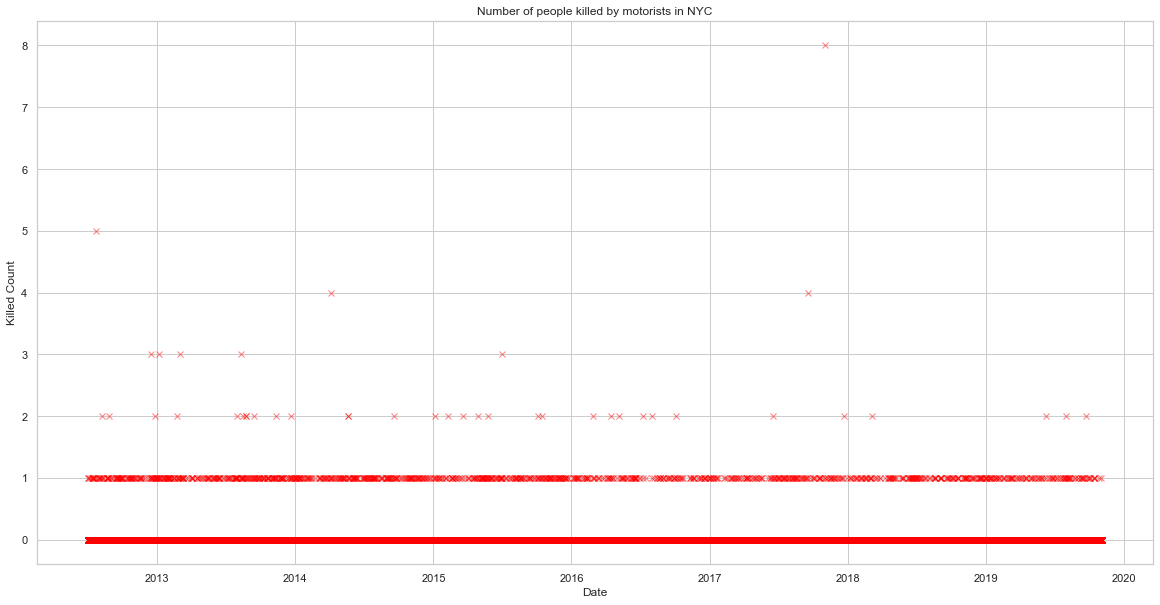

In [90]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

x = counted_lethal_crashes['date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC")

plt.show()

We have succesfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.

## Contributing factors to crash fatalities

Next we'll look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [71]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
54,unspecified,678
10,driver inattention/distraction,220
16,failure to yield right-of-way,173
50,traffic control disregarded,172
53,unsafe speed,143


Finally, let's drop 0's if we have any.

In [72]:
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
8,cell phone (hand-held),0
7,brakes defective,0
5,animals action,0
2,accelerator defective,0
58,windshield inadequate,0


Yes, let's remove those zero values now.

In [73]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
12,driverless/runaway vehicle,2
20,glare,2
35,passing too closely,2
48,tow hitch defective,1
32,oversized vehicle,1


Great. Now let's Visualize Fatal Car Crash Causes in NYC.

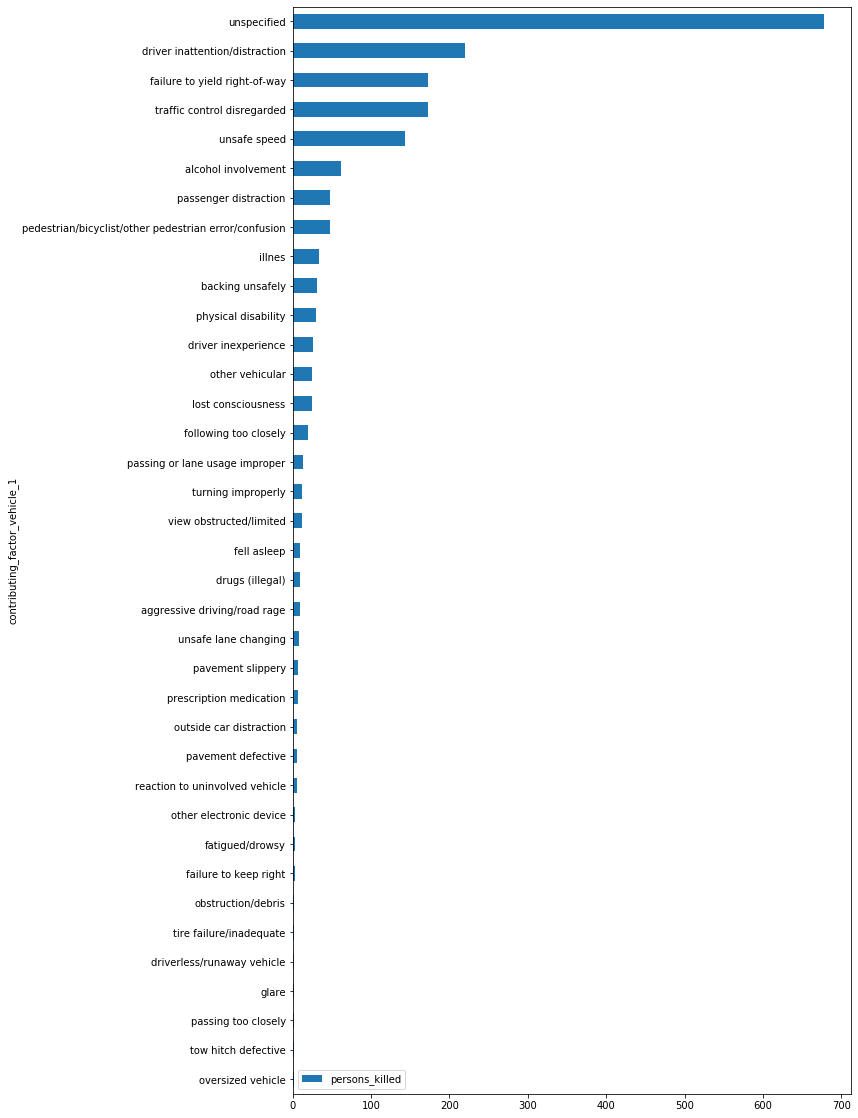

In [74]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by driver's bad behaviours, or are unrecorded.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

## Fatalities to pedestrians vs cyclists vs motorist

We'll switch to Seaborn for the rest of our work, which allows for greater range and easier user controls.

For this we'll compare the distributions of fatalities by the category of person killed. We'll group each category from our original dataframe into it's own dataframe. We will then add a column to each dataframe which creates a running total of persons killed, using the cumsum function.

In [75]:
killed_motorists = clean_nyc1.groupby('date').motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = clean_nyc1.groupby('date').cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = clean_nyc1.groupby('date').pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

Now we can plot these using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

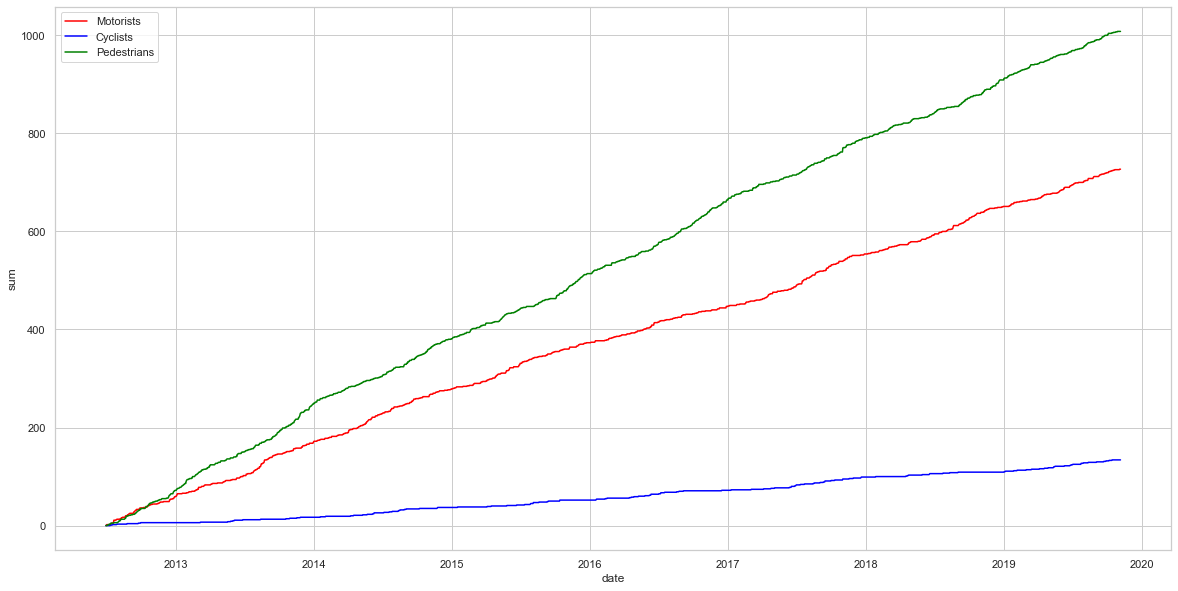

In [76]:
import seaborn as sns
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.

## Number of deaths by borough

Let's see the average of killed persons by borough with the collisions count.

In [77]:
clean_nyc1.groupby('borough').persons_killed.agg(['count', 'mean'])

,count,mean
borough,,
bronx,155331,0.001030
brooklyn,346148,0.001144
manhattan,268026,0.000825
queens,296866,0.001206
staten island,48402,0.001343


Let's graph this with a bar chart.

Text(0.5, 0, ' ')

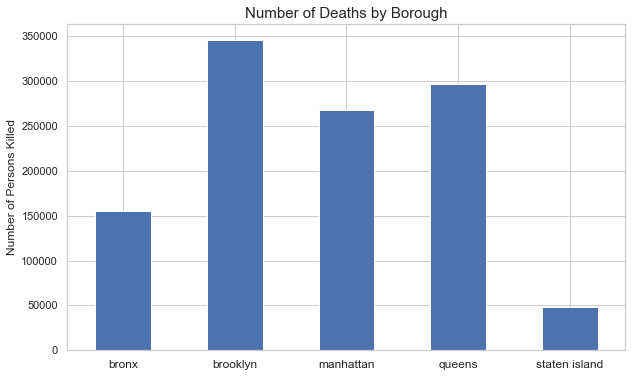

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.count().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number of Persons Killed')
plt.title('Number of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

It looks like Staten Island and Queens have the highest number of deaths, meanwhile Manhattan has the lowest number of deaths, which can be due to its smaller size.

## Number of deaths by hour

Let's see the mean of persons killed by hour. We are interested in seeing the percentage rate of persons killed for each hour. We want to see this information hourly to get a better general idea. To do so, we will first drop the missing values in the 'date' and 'time' columns and change their data types from integer to string. Then, create a new column named 'combined', which will combine 'date' and 'time' columns into the same panda series. Finally, take that series and convert it to datetime data type and store it in a new column called 'combined_date_time'. That will allow us to get the hours when graphing it.

In [79]:
clean_nyc1.dropna(subset = ['date'], how='all', inplace=True)
clean_nyc1.dropna(subset = ['time'], how='all', inplace=True)
clean_nyc1['date'] = clean_nyc1.date.astype(str)
clean_nyc1['time'] = clean_nyc1.time.astype(str)
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,season
0,2018-08-22,16:30,brooklyn,11213.0,40.668950,-73.933900,point (-73.9339 40.66895),0,0,0,0,0,0,0,0,unspecified,unspecified,3970350,sedan,van,Summer
1,2018-09-10,18:15,queens,11365.0,40.740580,-73.781494,point (-73.781494 40.74058),0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,3978151,sedan,sedan,Autumn
2,2018-08-31,20:08,NaN,nan,40.604153,-74.051980,point (-74.05198 40.604153),0,0,0,0,0,0,0,0,following too closely,unspecified,3973998,sedan,station wagon/sport utility vehicle,Summer
3,2018-09-12,14:00,NaN,nan,40.737500,-73.933850,point (-73.93385 40.7375),1,0,0,0,0,0,1,0,tire failure/inadequate,other vehicular,3980073,station wagon/sport utility vehicle,station wagon/sport utility vehicle,Autumn
4,2018-08-23,9:15,queens,11101.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,3967387,sedan,station wagon/sport utility vehicle,Summer


In [80]:
combined = clean_nyc1.date.str.cat(clean_nyc1.time, sep= ' ')
combined.head()

0    2018-08-22 16:30
1    2018-09-10 18:15
2    2018-08-31 20:08
3    2018-09-12 14:00
4     2018-08-23 9:15
Name: date, dtype: object

In [81]:
clean_nyc1['combined_date_time'] = pd.to_datetime(combined)

In [82]:
clean_nyc1.dtypes

date                                     object
time                                     object
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
location                                 object
persons_injured                           int64
persons_killed                            int64
pedestrians_injured                       int64
pedestrians_killed                        int64
cyclist_injured                           int64
cyclist_killed                            int64
motorist_injured                          int64
motorist_killed                           int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
collision_id                              int64
vehicle_type_code1                       object
vehicle_type_code2                       object
season                                  

Text(0.5, 0, 'Time')

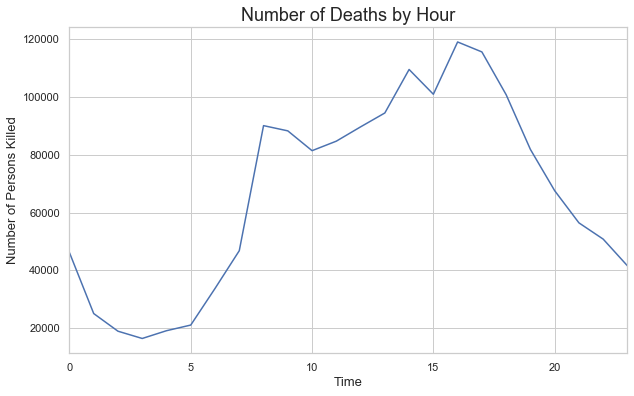

In [83]:
clean_nyc1.groupby(clean_nyc1.combined_date_time.dt.hour).persons_killed.count().plot(figsize=(10, 6))
plt.title('Number of Deaths by Hour', fontsize=18)
plt.ylabel('Number of Persons Killed', fontsize=13)
plt.xlabel('Time', fontsize=13)

It looks like number of deaths goes up around 4:00 in the morning and 23:00 in the evening. It decreases during the day between 8:00 and 14:00, which are typical work hours.

## Pedestrian injuries in Brooklyn due to driver inexperience

Finally, we will import the data set from nypd motor vehicle crash and limit 30,000 rows and looking at the values containing Brooklyn (borough of occurance) and Driver Inexperience (for contributing factor vehicle 1) This will allow us to work with some of the dataset and look at crashes involving driver inexperience in the borough of Brooklyn.

In [84]:
mv_data = pd.read_csv('https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=30000&borough=BROOKLYN&contributing_factor_vehicle_1=Driver%20Inexperience')


Let's check it.

In [85]:
mv_data.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-01-17T00:00:00.000,12:30,BROOKLYN,11201,40.695385,-73.98324,POINT (-73.98324 40.695385),NaN,NaN,301 GOLD STREET,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4056959,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-12-26T00:00:00.000,13:06,BROOKLYN,11220,40.640347,-74.00093,POINT (-74.00093 40.640347),9 AVENUE,49 STREET,NaN,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4052941,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-01-17T00:00:00.000,13:15,BROOKLYN,11211,40.707020,-73.95543,POINT (-73.95543 40.70702),DIVISION AVENUE,KEAP STREET,NaN,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4056467,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
3,2019-01-17T00:00:00.000,5:10,BROOKLYN,11207,40.662280,-73.90003,POINT (-73.90003 40.66228),VAN SIDERIN AVENUE,RIVERDALE AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4056553,Sedan,Sedan,NaN,NaN,NaN
4,2019-01-05T00:00:00.000,2:27,BROOKLYN,11211,40.710907,-73.95165,POINT (-73.95165 40.710907),BORINQUEN PLACE,HOOPER STREET,NaN,0,0,0,0,0,0,0,0,Driver Inexperience,Driver Inexperience,NaN,NaN,NaN,4062398,Taxi,Sedan,NaN,NaN,NaN


Now we can find the unique types of vehicles involved in these crashes. Let's look at vehcile number one, the first vehicle impacting. This column value is vehicle_type_code1.

In [86]:
mv_data['vehicle_type_code1'].unique()

array(['Station Wagon/Sport Utility Vehicle', 'Tractor Truck Diesel',
       'Sedan', 'Taxi', nan, 'Box Truck', 'Bus', 'Pick-up Truck', 'Ambul',
       'Bike', 'Moped', 'SPORT UTILITY / STATION WAGON',
       'PASSENGER VEHICLE', 'PICK-UP TRUCK', 'MOTORCYCLE', 'BICYCLE',
       'TAXI', 'Van', 'Carry All', 'E-Sco', 'Dump', 'Motorbike',
       'Ambulance', 'DELIV', 'E-Bik', 'SMALL COM VEH(4 TIRES) ',
       'LIVERY VEHICLE', 'FIRE TRUCK', 'BUS', 'OTHER',
       'LARGE COM VEH(6 OR MORE TIRES)', 'Chassis Cab', 'Trail', 'MOPED',
       'Motorscooter', 'Garbage or Refuse', 'Tractor Truck Gasoline',
       'usps', 'Motorcycle', 'Minicycle', 'TRUCK', 'MOPD', 'tow t',
       'Convertible', 'PK', 'FDNY', 'motor', 'MS', 'STREE', 'CRANE',
       'TRACK', 'Flat Bed', 'CONV', 'BU', 'Tanker', 'BULLD', 'TK', 'VN',
       'FB', 'Tow Truck / Wrecker', 'FIRE', '3-Door', 'NYPD', 'GG', 'DS',
       'AM', 'UNKNOWN', 'TOW T', 'CB', 'LL', 'TOW', 'DP', 'FORKL', 'VAN',
       'UTILI', 'RESCU', 'SCOOTER', '4 dr

We can further narrow what we are looking at by selecting for vehicle types. We can look at Station Wagon/Sport Utility Vehicle and Sedan. So, in Brooklyn for inexperienced drivers, what can we see for this group driving Station Wagon/Sport Utility Vehicle versus driving a sedan.

In [87]:
mv_data['vehicle_type_code1'].value_counts().head(25)

PASSENGER VEHICLE                      2110
SPORT UTILITY / STATION WAGON           859
Sedan                                   555
Station Wagon/Sport Utility Vehicle     396
SMALL COM VEH(4 TIRES)                   75
OTHER                                    70
PICK-UP TRUCK                            68
VAN                                      64
TAXI                                     49
LARGE COM VEH(6 OR MORE TIRES)           45
UNKNOWN                                  43
Pick-up Truck                            37
BUS                                      35
MOTORCYCLE                               35
Taxi                                     31
Box Truck                                30
Bus                                      20
Tractor Truck Diesel                     15
LIVERY VEHICLE                           12
Van                                      12
BU                                        9
Motorcycle                                8
TK                              

So for Brooklyn and crashes due to inexperienced drivers, passenger vehicle, sports utility/station wagon, sedan, and then station wagon/sport utility were the largest number of vehicles involved in the crashes. We could maybe combine sports utility/station wagon and station wagon/sport utility groups.

In [88]:
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('SPORT UTILITY / STATION WAGON', 'SUV')
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('Station Wagon/Sport Utility Vehicle', 'SUV')

Let's look at this same information with seaborn data visualization tool.

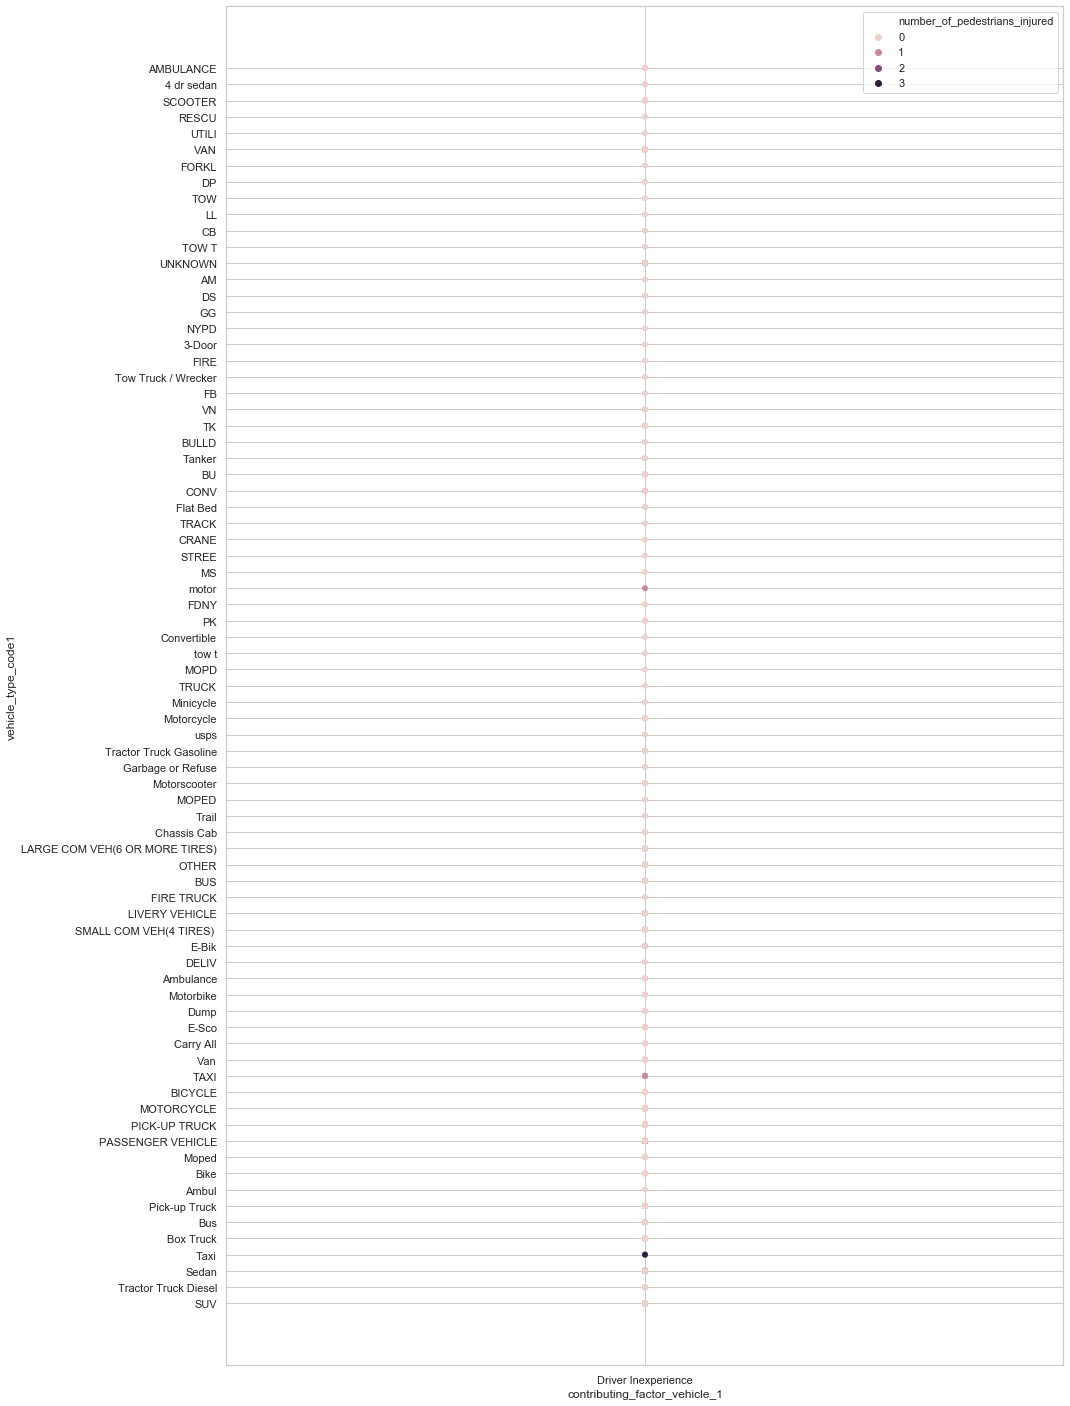

In [89]:
f, ax = plt.subplots(figsize=(15, 25))
sns.scatterplot(x="contributing_factor_vehicle_1", y="vehicle_type_code1", 
               hue="number_of_pedestrians_injured", linewidth=0, data=mv_data, ax=ax)

So, it looks like for this particular item, crashes with driver inexperience, most vehicles did not have pedestrian injuries. Livery vehicles had 1 pedestrian injury and "motor" (what is motor compared to motor vehicle, I'm not sure) had 1 pedestrian injury.